In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal

# 1. file path

In [2]:
# AMSER-E BT 
folder_BT=r'E:\rahul\processed_data\ASTER_BT_clipped'
f_BT06_9V=[]
f_BT10_7V=[]
f_BT18_7V=[]
f_BT36_5V=[]
f_BT89_0V=[]
f_soilM=[]
f_vegW=[]

for root, dirs, files in os.walk(folder_BT):
    for names in files:
        if 'TB06_9V' in names:
            full_path=os.path.join(root,names)
            print(full_path)
            f_BT06_9V.append(full_path)
            
        if 'TB10_7V' in names:
            full_path=os.path.join(root,names)
            print(full_path)
            f_BT10_7V.append(full_path)
            
        if 'TB18_7V' in names:
            full_path=os.path.join(root,names)
            print(full_path)
            f_BT18_7V.append(full_path)
            
        if 'TB36_5V_Res_1' in names:
            full_path=os.path.join(root,names)
            print(full_path)
            f_BT36_5V.append(full_path)
            
        if 'TB89_0V' in names:
            full_path=os.path.join(root,names)
            print(full_path)
            f_BT89_0V.append(full_path)
            
        if 'A_Soil_Moisture' in names:
            full_path=os.path.join(root,names)
            print(full_path)
            f_soilM.append(full_path)
            
        if 'A_Veg_Water_Content' in names:
            full_path=os.path.join(root,names)
            print(full_path)
            f_vegW.append(full_path)
            
# MODIS LST
folder_LST=r'E:\rahul\processed_data\MODIS_LST_clipped'
f_LST=[]
for root, dirs, files in os.walk(folder_LST):
    for names in files:
        full_path=os.path.join(root,names)
        print(full_path)
        f_LST.append(full_path)
        


E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060401_Ascending_Land_Grid_A_Soil_Moisture_5a345a8f.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060401_Ascending_Land_Grid_A_TB06_9V_Res_1_5a345a8f.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060401_Ascending_Land_Grid_A_TB10_7V_Res_1_5a345a8f.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060401_Ascending_Land_Grid_A_TB18_7V_Res_1_5a345a8f.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060401_Ascending_Land_Grid_A_TB36_5V_Res_1_5a345a8f.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060401_Ascending_Land_Grid_A_TB89_0V_Res_4_5a345a8f.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060401_Ascending_Land_Grid_A_Veg_Water_Content_5a345a8f.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V0

In [3]:
def WriteImage(outpath,image,proj,geo):
    ds=None
    driver=gdal.GetDriverByName("GTiff")
    ds=driver.Create(outpath,image.shape[1],image.shape[0], 1,gdal.GDT_Float32)
    ds.SetProjection(proj)
    ds.SetGeoTransform(geo)
    ds.GetRasterBand(1).WriteArray(image)
    return ds

In [4]:
# projection and geotransformation
data=gdal.Open(f_LST[1])
proj=data.GetProjection()
trans=data.GetGeoTransform()

In [10]:
# emissivity output path
outpath_emissivity_6=r'E:/rahul/processed_data/Derived_emissivity_6GHzV/'
outpath_emissivity_10=r'E:/rahul/processed_data/Derived_emissivity_10GHzV/'
outpath_emissivity_18=r'E:/rahul/processed_data/Derived_emissivity_18GHzV/'
outpath_emissivity_36=r'E:/rahul/processed_data/Derived_emissivity_36GHzV/'
outpath_emissivity_89=r'E:/rahul/processed_data/Derived_emissivity_89GHzV/'

outpath_emissivity_difference_6=r'E:/rahul/processed_data/Emissivity_difference_6GHzV/'
outpath_emissivity_difference_10=r'E:/rahul/processed_data/Emissivity_difference_10GHzV/'
outpath_emissivity_difference_18=r'E:/rahul/processed_data/Emissivity_difference_18GHzV/'
outpath_emissivity_difference_36=r'E:/rahul/processed_data/Emissivity_difference_36GHzV/'
outpath_emissivity_difference_89=r'E:/rahul/processed_data/Emissivity_difference_89GHzV/'

In [11]:
# AMSER-E monthly mean emissivity
monthly_mean_emiss_6=gdal.Open(r'E:/rahul/processed_data/AMSER_E_EMISSIVITY/ AMSER-E_monthly_emissivity6.9  V.tif.tif')
monthly_mean_emiss_6=monthly_mean_emiss_6.ReadAsArray()
monthly_mean_emiss_10=gdal.Open(r'E:/rahul/processed_data/AMSER_E_EMISSIVITY/ AMSER-E_monthly_emissivity10.7 V.tif.tif')
monthly_mean_emiss_10=monthly_mean_emiss_10.ReadAsArray()
monthly_mean_emiss_18=gdal.Open(r'E:/rahul/processed_data/AMSER_E_EMISSIVITY/ AMSER-E_monthly_emissivity18.7 V.tif.tif')
monthly_mean_emiss_18=monthly_mean_emiss_18.ReadAsArray()
monthly_mean_emiss_36=gdal.Open(r'E:/rahul/processed_data/AMSER_E_EMISSIVITY/ AMSER-E_monthly_emissivity36.5 V.tif.tif')
monthly_mean_emiss_36=monthly_mean_emiss_36.ReadAsArray()
monthly_mean_emiss_89=gdal.Open(r'E:/rahul/processed_data/AMSER_E_EMISSIVITY/ AMSER-E_monthly_emissivity89.0 V.tif.tif')
monthly_mean_emiss_89=monthly_mean_emiss_89.ReadAsArray()

In [21]:

#  analysis
for i in range(30):
# --------Brightness temperature----------
    BT_6V=gdal.Open(f_BT06_9V[i])
    BT_6V=(BT_6V.ReadAsArray().astype('float64'))/10
    BT_6V[BT_6V<=100.0]=np.nan
    BT_6V[BT_6V>=500.0]=np.nan
    
    BT_10V=gdal.Open(f_BT10_7V[i])
    BT_10V=(BT_10V.ReadAsArray().astype('float64'))/10
    BT_10V[BT_10V<=100.0]=np.nan
    BT_10V[BT_10V>=500.0]=np.nan

    BT_18V=gdal.Open(f_BT18_7V[i])
    BT_18V=(BT_18V.ReadAsArray().astype('float64'))/10
    BT_18V[BT_18V<=100.0]=np.nan
    BT_18V[BT_18V>=500.0]=np.nan

    BT_36V=gdal.Open(f_BT36_5V[i])
    BT_36V=(BT_36V.ReadAsArray().astype('float64'))/10
    BT_36V[BT_36V<=100.0]=np.nan
    BT_36V[BT_36V>=500.0]=np.nan
    
    BT_89V=gdal.Open(f_BT89_0V[i])
    BT_89V=(BT_89V.ReadAsArray().astype('float64'))/10
    BT_89V[BT_89V<=100.0]=np.nan
    BT_89V[BT_89V>=500.0]=np.nan
    
# ---------------LST----------------------
    LST=gdal.Open(f_LST[i])
    LST=(LST.ReadAsArray().astype('float64'))
    LST[LST<=200.0]=np.nan

# ------------emissivity-----------------
    emissivity=BT_6V/LST
    emissivity[emissivity>0.99]=np.nan
    destination_emissivity=outpath_emissivity_6+ 'derived_emissivity '+f_LST[i][58:66] +' 6GHzV.tif'
    emm=WriteImage(destination_emissivity,emissivity,proj,trans)
    
    emissivit_difference=emissivity-monthly_mean_emiss_6
    destination_emissivity_difference=outpath_emissivity_difference_6+ 'emissivity difference '+f_LST[i][58:66] +' 6GHzV.tif'
    diff=WriteImage(destination_emissivity_difference,emissivit_difference,proj,trans)
#     -------
    emissivity=BT_10V/LST
    emissivity[emissivity>0.99]=np.nan
    destination_emissivity=outpath_emissivity_10+ 'derived_emissivity '+f_LST[i][58:66] +' 10GHzV.tif'
    emm=WriteImage(destination_emissivity,emissivity,proj,trans)
    
    emissivit_difference=emissivity-monthly_mean_emiss_10
    destination_emissivity_difference=outpath_emissivity_difference_10+ 'emissivity difference '+f_LST[i][58:66] +' 10GHzV.tif'
    diff=WriteImage(destination_emissivity_difference,emissivit_difference,proj,trans)
#     -------
    
    emissivity=BT_18V/LST
    emissivity[emissivity>0.99]=np.nan
    destination_emissivity=outpath_emissivity_18+ 'derived_emissivity '+f_LST[i][58:66] +' 18GHzV.tif'
    emm=WriteImage(destination_emissivity,emissivity,proj,trans)
    
    emissivit_difference=emissivity-monthly_mean_emiss_18
    destination_emissivity_difference=outpath_emissivity_difference_18+ 'emissivity difference '+f_LST[i][58:66] +' 18GHzV.tif'
    diff=WriteImage(destination_emissivity_difference,emissivit_difference,proj,trans)
#     --------
    
    emissivity=BT_36V/LST
    emissivity[emissivity>0.99]=np.nan
    destination_emissivity=outpath_emissivity_36+ 'derived_emissivity '+f_LST[i][58:66] +' 36GHzV.tif'
    emm=WriteImage(destination_emissivity,emissivity,proj,trans)
    
    emissivit_difference=emissivity-monthly_mean_emiss_36
    destination_emissivity_difference=outpath_emissivity_difference_36+ 'emissivity difference '+f_LST[i][58:66] +' 36GHzV.tif'
    diff=WriteImage(destination_emissivity_difference,emissivit_difference,proj,trans)
#     ------------
    
    emissivity=BT_89V/LST
    emissivity[emissivity>0.99]=np.nan
    destination_emissivity=outpath_emissivity_89+ 'derived_emissivity '+f_LST[i][58:66] +' 89GHzV.tif'
    emm=WriteImage(destination_emissivity,emissivity,proj,trans)
    emm=None
    
    emissivit_difference=emissivity-monthly_mean_emiss_89
    destination_emissivity_difference=outpath_emissivity_difference_89+ 'emissivity difference '+f_LST[i][58:66] +' 89GHzV.tif'
    diff=WriteImage(destination_emissivity_difference,emissivit_difference,proj,trans)
    diff=None
#     -----------

    

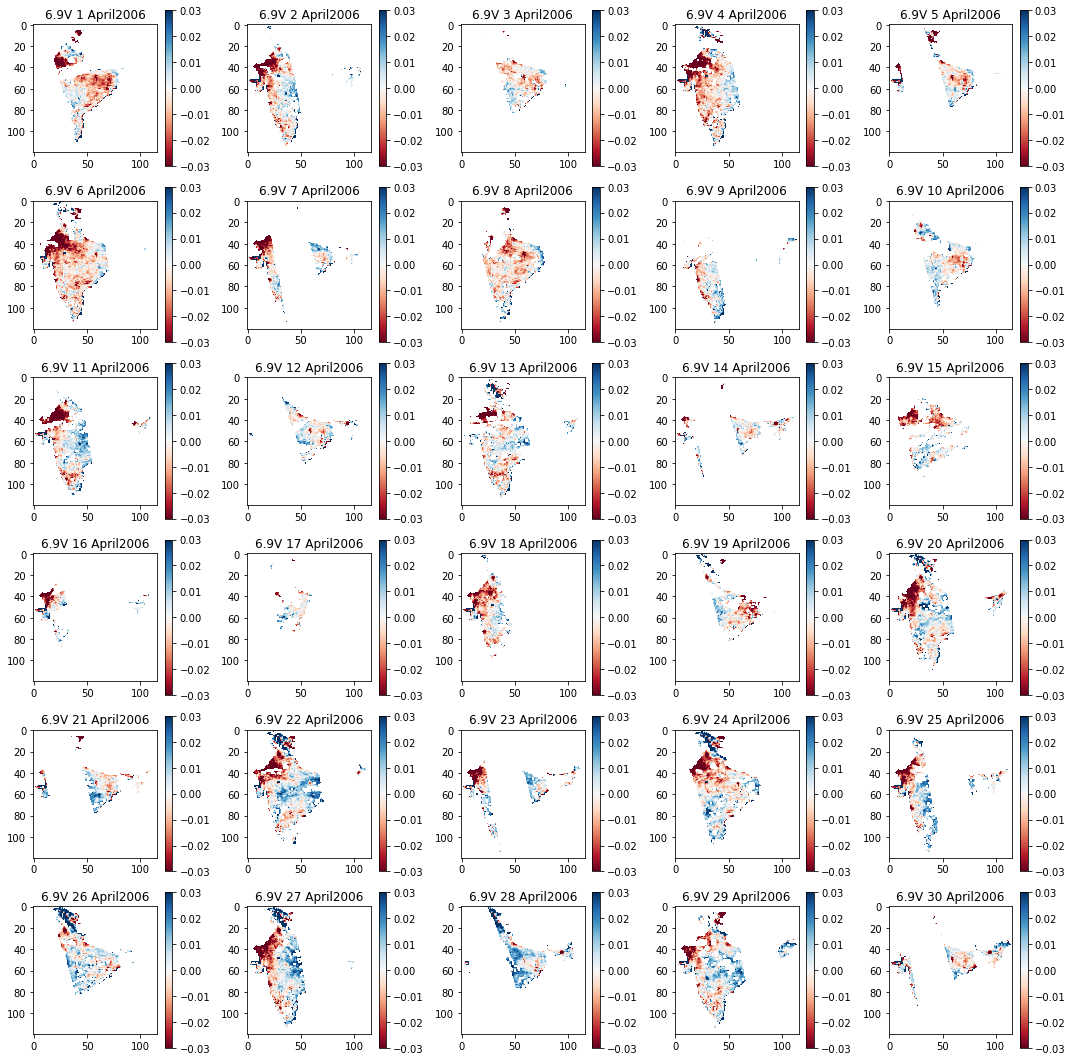

In [15]:
folder_diff_emiss=r'E:\rahul\processed_data\Emissivity_difference_6GHzV'
f_diff_emiss=[]
for root, dirs, files in os.walk(folder_diff_emiss):
    for names in files:
        full_path=os.path.join(root,names)
        f_diff_emiss.append(full_path)
        
# define subplots
fig, axs = plt.subplots(6,5,figsize=(15,15));
number=0;
for i in range(6):
    for j in range(5):
        fig.tight_layout()
        data=gdal.Open(f_diff_emiss[number])
        data=data.ReadAsArray()
        pos=axs[i,j].imshow(data,cmap = 'RdBu',vmin=-0.03,vmax=0.03);
        fig.colorbar(pos, ax = axs[i,j])
        axs[i,j].set_title('6.9V '+str(number+1)+' April2006');
        number+=1;
        
fig.savefig(r'E:\rahul\processed_data\Emissivity_difference_6GHzV.jpeg',dpi=300)

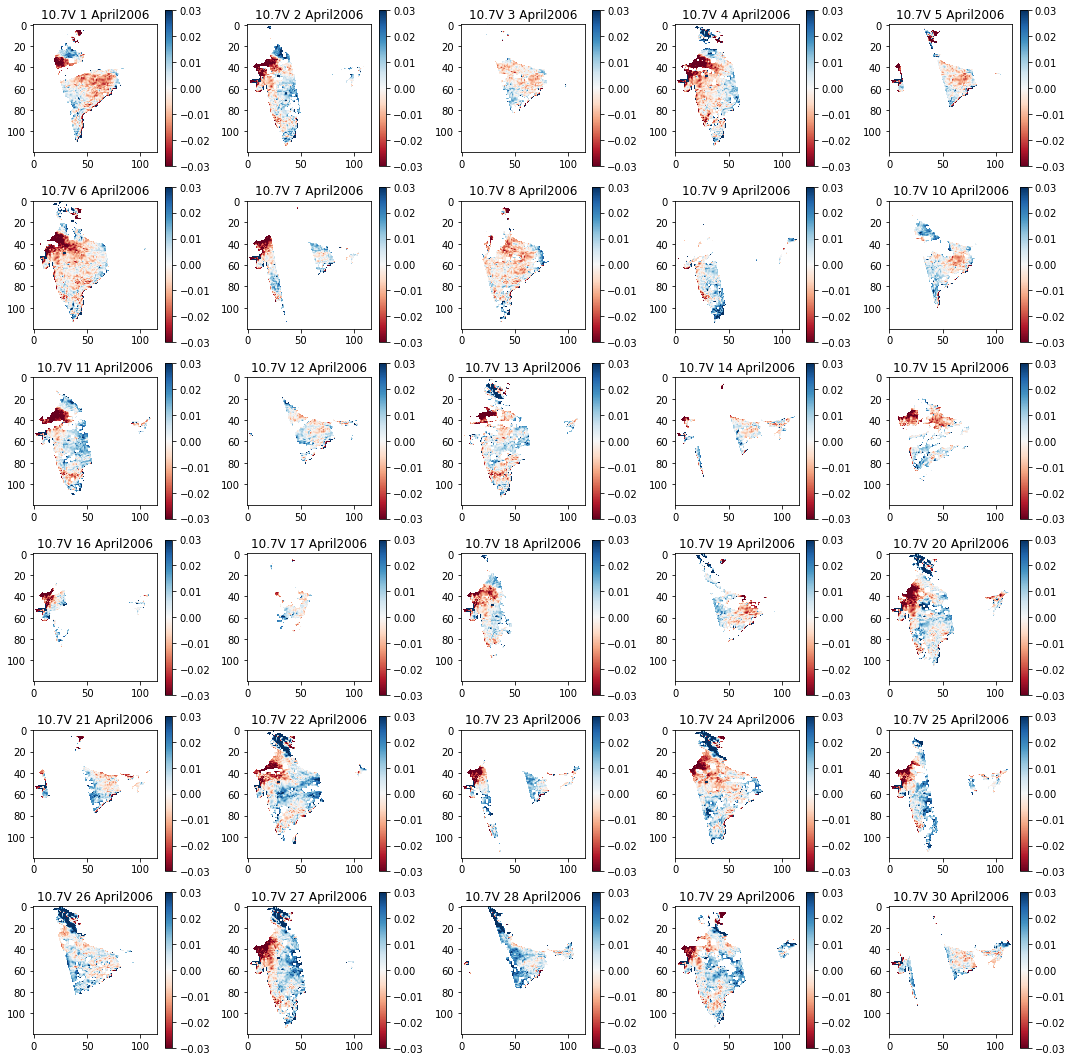

In [16]:
folder_diff_emiss=r'E:\rahul\processed_data\Emissivity_difference_10GHzV'
f_diff_emiss=[]
for root, dirs, files in os.walk(folder_diff_emiss):
    for names in files:
        full_path=os.path.join(root,names)
        f_diff_emiss.append(full_path)
        
# define subplots
fig, axs = plt.subplots(6,5,figsize=(15,15));
number=0;
for i in range(6):
    for j in range(5):
        fig.tight_layout()
        data=gdal.Open(f_diff_emiss[number])
        data=data.ReadAsArray()
        pos=axs[i,j].imshow(data,cmap = 'RdBu',vmin=-0.03,vmax=0.03);
        fig.colorbar(pos, ax = axs[i,j])
        axs[i,j].set_title('10.7V '+str(number+1)+' April2006');
        number+=1;
        
fig.savefig(r'E:\rahul\processed_data\Emissivity_difference_10GHzV.jpeg',dpi=300)

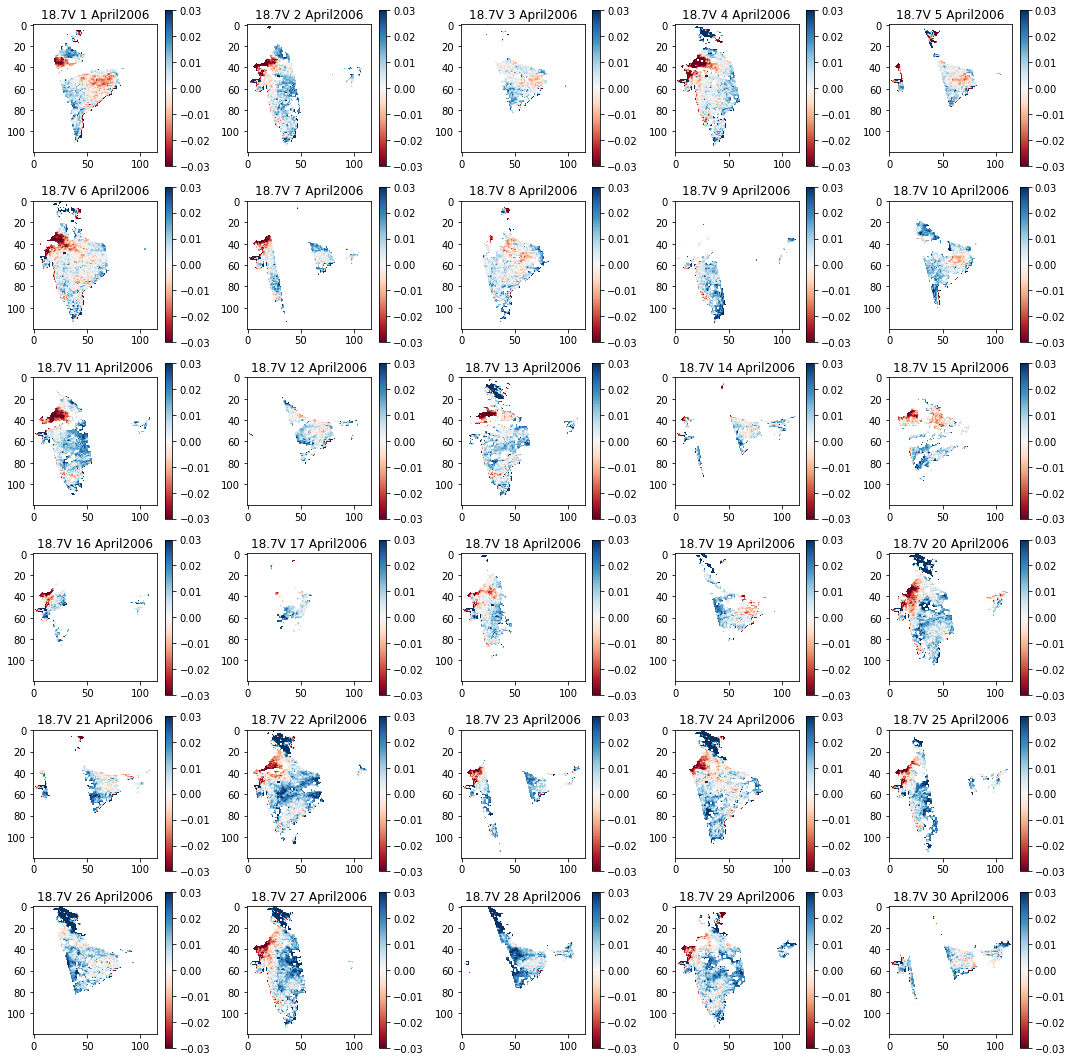

In [17]:
folder_diff_emiss=r'E:\rahul\processed_data\Emissivity_difference_18GHzV'
f_diff_emiss=[]
for root, dirs, files in os.walk(folder_diff_emiss):
    for names in files:
        full_path=os.path.join(root,names)
        f_diff_emiss.append(full_path)
        
# define subplots
fig, axs = plt.subplots(6,5,figsize=(15,15));
number=0;
for i in range(6):
    for j in range(5):
        fig.tight_layout()
        data=gdal.Open(f_diff_emiss[number])
        data=data.ReadAsArray()
        pos=axs[i,j].imshow(data,cmap = 'RdBu',vmin=-0.03,vmax=0.03);
        fig.colorbar(pos, ax = axs[i,j])
        axs[i,j].set_title('18.7V '+str(number+1)+' April2006');
        number+=1;
        
fig.savefig(r'E:\rahul\processed_data\Emissivity_difference_18GHzV.jpeg',dpi=300)

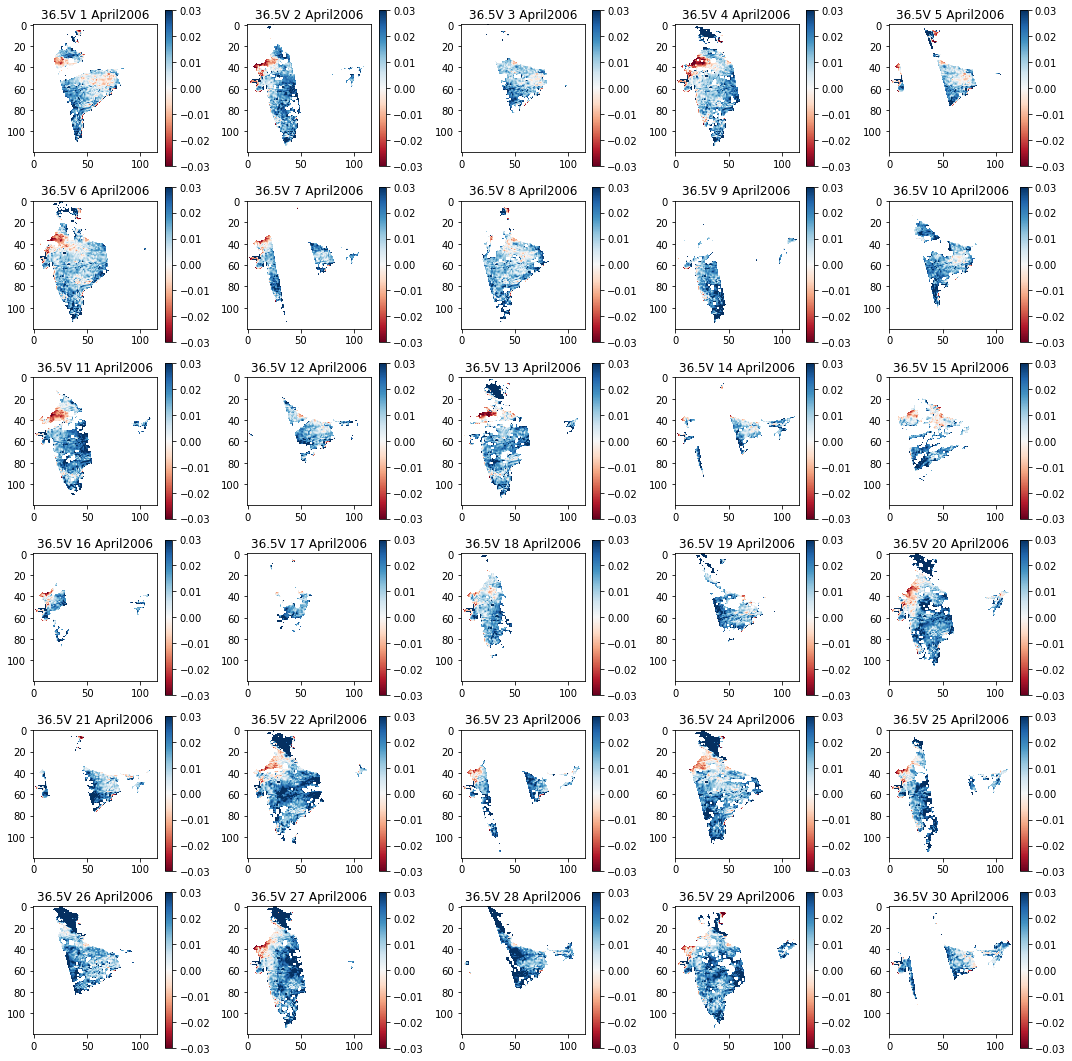

In [18]:
folder_diff_emiss=r'E:\rahul\processed_data\Emissivity_difference_36GHzV'
f_diff_emiss=[]
for root, dirs, files in os.walk(folder_diff_emiss):
    for names in files:
        full_path=os.path.join(root,names)
        f_diff_emiss.append(full_path)
        
# define subplots
fig, axs = plt.subplots(6,5,figsize=(15,15));
number=0;
for i in range(6):
    for j in range(5):
        fig.tight_layout()
        data=gdal.Open(f_diff_emiss[number])
        data=data.ReadAsArray()
        pos=axs[i,j].imshow(data,cmap = 'RdBu',vmin=-0.03,vmax=0.03);
        fig.colorbar(pos, ax = axs[i,j])
        axs[i,j].set_title('36.5V '+str(number+1)+' April2006');
        number+=1;
        
fig.savefig(r'E:\rahul\processed_data\Emissivity_difference_36GHzV.jpeg',dpi=300)

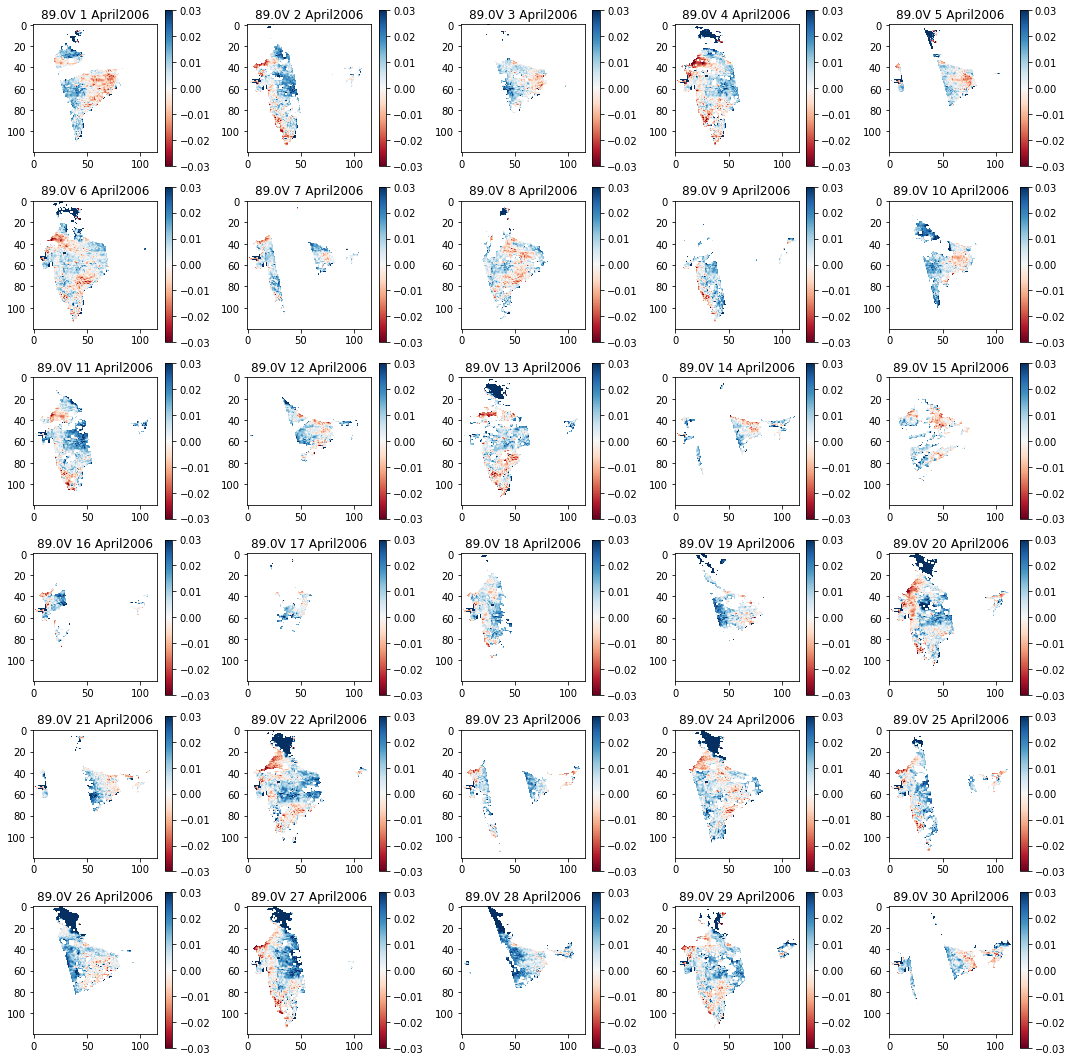

In [22]:
folder_diff_emiss=r'E:\rahul\processed_data\Emissivity_difference_89GHzV'
f_diff_emiss=[]
for root, dirs, files in os.walk(folder_diff_emiss):
    for names in files:
        full_path=os.path.join(root,names)
        f_diff_emiss.append(full_path)
        
# define subplots
fig, axs = plt.subplots(6,5,figsize=(15,15));
number=0;
for i in range(6):
    for j in range(5):
        fig.tight_layout()
        data=gdal.Open(f_diff_emiss[number])
        data=data.ReadAsArray()
        pos=axs[i,j].imshow(data,cmap = 'RdBu',vmin=-0.03,vmax=0.03);
        fig.colorbar(pos, ax = axs[i,j])
        axs[i,j].set_title('89.0V '+str(number+1)+' April2006');
        number+=1;
        
fig.savefig(r'E:\rahul\processed_data\Emissivity_difference_89GHzV.jpeg',dpi=300)

In [6]:
# to create soil moisture images
# for i in range(30):
#     data=gdal.Open(f_soilM[i])
#     data=data.ReadAsArray().astype('float64')
#     data[data<0.0]=np.nan
#     data[data>500.0]=np.nan
#     data=data*0.001
    
#     soil_out=r'E:/rahul/Processed_data/soil moisture/'
#     soil_out_path=soil_out+ 'soil moisture '+f_LST[i][58:66] +' 10.7GHzV.tif'
#     diff=WriteImage(soil_out_path,data,proj,trans)
#     diff=None

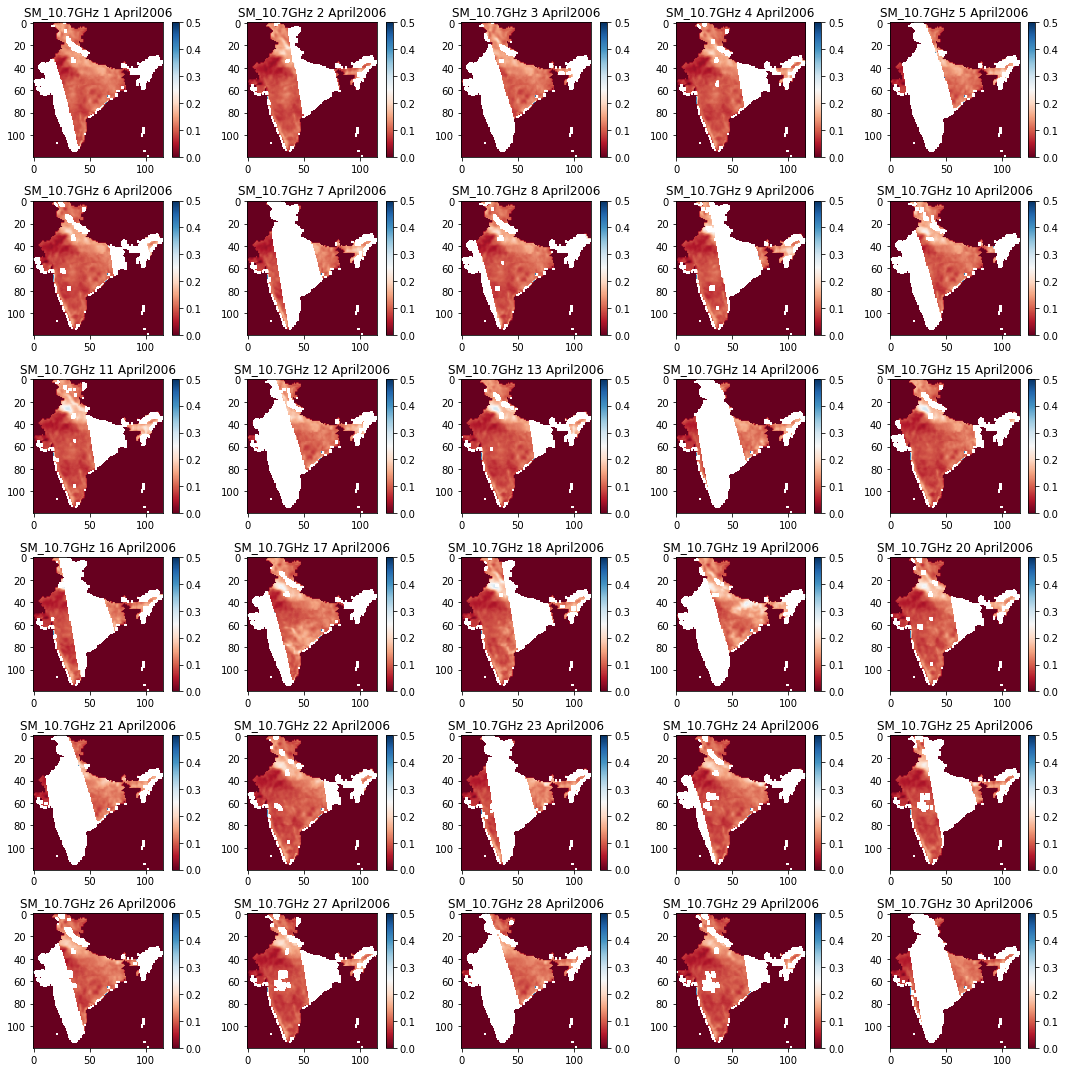

In [52]:
#  soil moisture plot
fig, axs = plt.subplots(6,5,figsize=(15,15));
number=0;
for i in range(6):
    for j in range(5):
        fig.tight_layout()
        data=gdal.Open(f_soilM[number])
        data=data.ReadAsArray().astype('float64')
        data[data<0.0]=np.nan
        data[data>500.0]=np.nan
        data=data*0.001
        pos=axs[i,j].imshow(data,cmap = 'RdBu',vmin=0.0,vmax=0.5);
        fig.colorbar(pos, ax = axs[i,j])
        axs[i,j].set_title('SM_10.7GHz '+str(number+1)+' April2006');
        number+=1;
        
fig.savefig(r'E:\rahul\processed_data\Soil Moisture.jpeg',dpi=300)

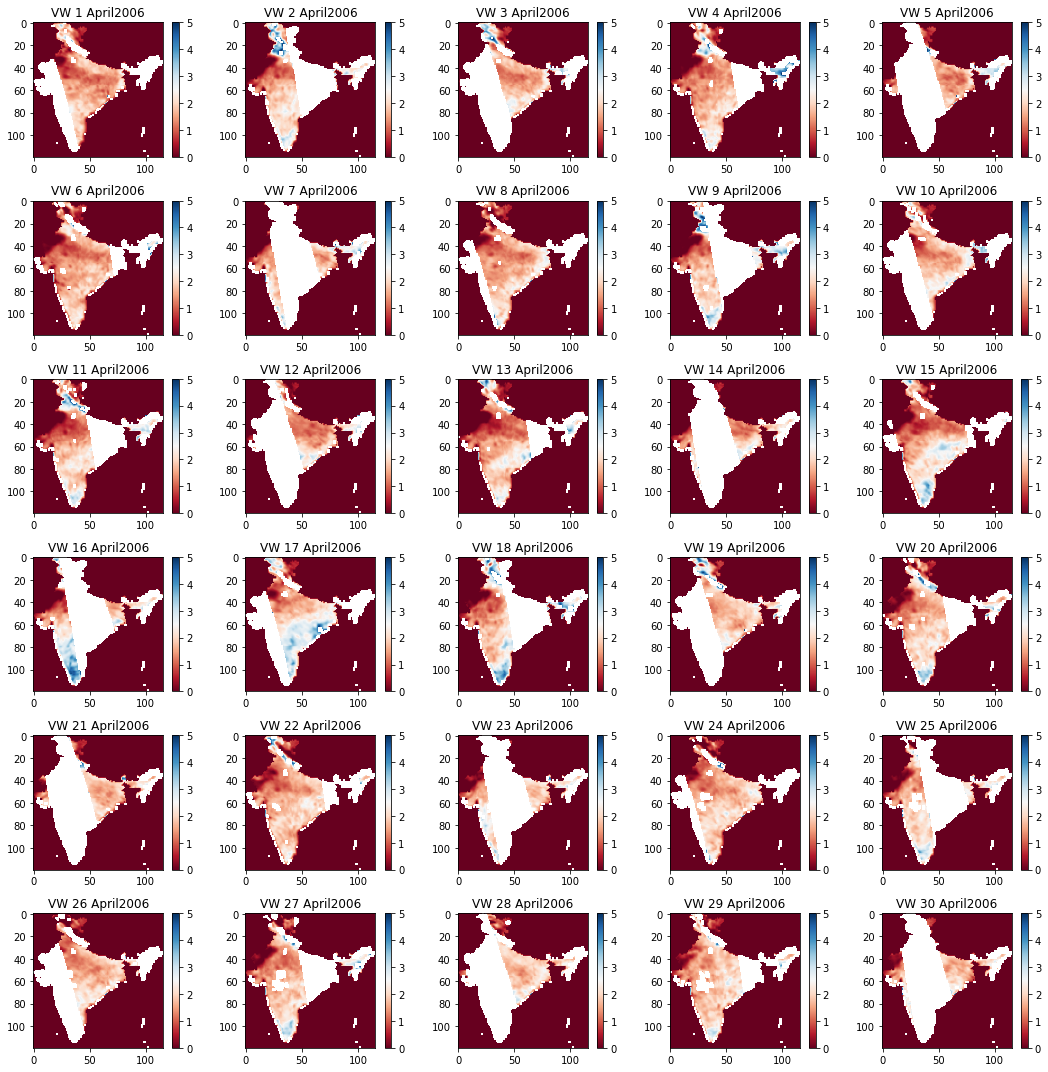

In [53]:
fig, axs = plt.subplots(6,5,figsize=(15,15));
number=0;
for i in range(6):
    for j in range(5):
        fig.tight_layout()
        data=gdal.Open(f_vegW[number])
        data=data.ReadAsArray().astype('float64')
        data[data<0.0]=np.nan
        data[data>500.0]=np.nan
        data=data*0.01
        
        pos=axs[i,j].imshow(data,cmap = 'RdBu',vmin=0.0,vmax=5.0);
        fig.colorbar(pos, ax = axs[i,j])
        axs[i,j].set_title('VW '+str(number+1)+' April2006');
        number+=1;
        
fig.savefig(r'E:\rahul\processed_data\vegetation water.jpeg',dpi=300)